# This notebook show the sementic and instance Segmentation

## downlad the pre-trained weight file for deeplab and mark-RCNN from below link. 

In [0]:
!wget https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5
!wget https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.2/mask_rcnn_coco.h5

## install pixellib

In [13]:
!pip install pixellib

## Import the neccessary Library

In [0]:
import cv2
import matplotlib.pyplot as plt
from pixellib.semantic import semantic_segmentation
from pixellib.instance import instance_segmentation

## handfull function for display and compare result 

In [0]:
def display_img(img,title='Image'):
    fig = plt.figure()
    fig = plt.gcf()
    fig.set_size_inches(15, 9)
    res = isinstance(img,str)
    if res:
        img = cv2.imread(img)
        
    if len(img.shape)==3:
        img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
        
    else:
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
        
def compareColorImage(img1, img2, isColor = 1):
    #fig,(ax1,ax2) = plt.subplots(1,2)
    fig = plt.figure()
    fig = plt.gcf()
    fig.set_size_inches(15, 9)
    res = isinstance(img1, str)
    if res:
        img1= cv2.imread(img1)
    res =isinstance(img2,str)
    if res:
        img2= cv2.imread(img2)
    
    if(isColor ==1):
        ax1 =fig.add_subplot(1,2,1)
        img1= cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
        plt.imshow(img1)
        ax1.set_title("original")
        ax1.axis('off')
       
        ax2 =fig.add_subplot(1,2,2)
        img2= cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
        plt.imshow(img2)
        ax2.set_title("result")
        ax2.axis('off')
   
    else:
        ax1 =fig.add_subplot(1,2,1)
        plt.imshow(img1, cmap='gray')
        ax1.set_title("original")
        ax1.axis('off')
       
        ax2 = fig.add_subplot(1,2,1)
        plt.imshow(img2,cmap='gray')
        ax2.set_title("result")
        ax2.axis('off') 


## path declearation 

In [0]:
in_img_path = "/content/drive/My Drive/Colab Notebooks/Accenture_ML_DL/data/seg_data/Input Image.jpeg"
trained_sementic_model_path = "/content/drive/My Drive/Colab Notebooks/Accenture_ML_DL/data_to_save/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5"
trained_instance_model_path= "/content/drive/My Drive/Colab Notebooks/Accenture_ML_DL/data_to_save/mask_rcnn_coco.h5"



# sementic segmentation

In [19]:
sementic_segmented_img = "/content/drive/My Drive/Colab Notebooks/Accenture_ML_DL/data/seg_data/"+'sem_seg_'+in_img_path.split('/')[-1]
segment_image = semantic_segmentation()
segment_image.load_pascalvoc_model(trained_sementic_model_path)
# segment_image.segmentAsPascalvoc(in_img_path, output_image_name = sementic_segmented_img)
segment_image.segmentAsPascalvoc(in_img_path, output_image_name = sementic_segmented_img, overlay = True)
output, segmap = segment_image.segmentAsPascalvoc(in_img_path, overlay = True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Processing image....
Processed Image saved successfully in your current working directory.
Processing image....


## result

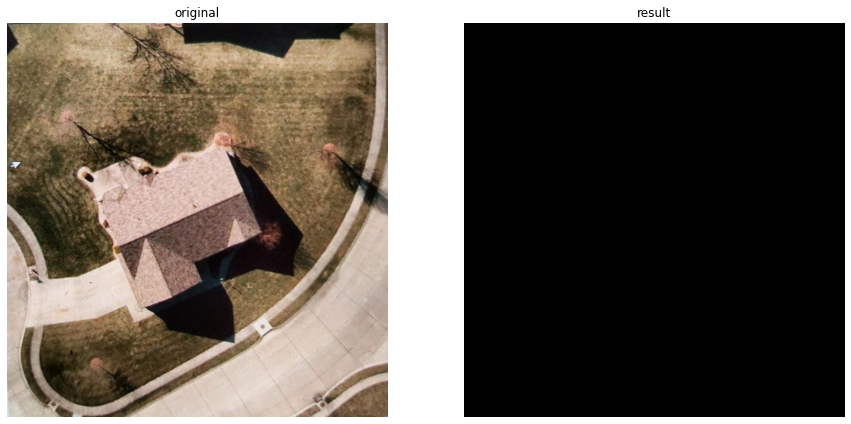

In [20]:
compareColorImage(in_img_path,output)

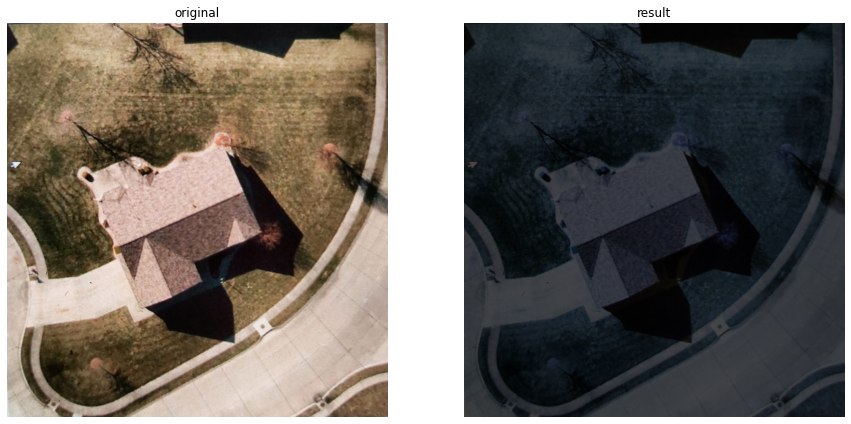

In [21]:
compareColorImage(in_img_path, sementic_segmented_img)

## instance segmentaton 

In [22]:
instance_segmented_img ="/content/drive/My Drive/Colab Notebooks/Accenture_ML_DL/data/seg_data/"+'ins_seg_'+in_img_path.split('/')[-1]
segment_image = instance_segmentation()
segment_image.load_model(trained_instance_model_path)
# segment_image.segmentImage(in_img_path, output_image_name =instance_segmented_img)
segment_image.segmentImage(in_img_path, output_image_name =instance_segmented_img, show_bboxes = True)

Processing image....
Processed Image saved successfully in your current working directory.


({'class_ids': array([77], dtype=int32), 'masks': array([[[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         ...,
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]]]), 'rois': array([[ 388,   63, 1262, 1120]], dtype=int32), 'scores': array([0.7107992], dtype=float32)},
 array([[[184, 165, 174],
         [

## Result

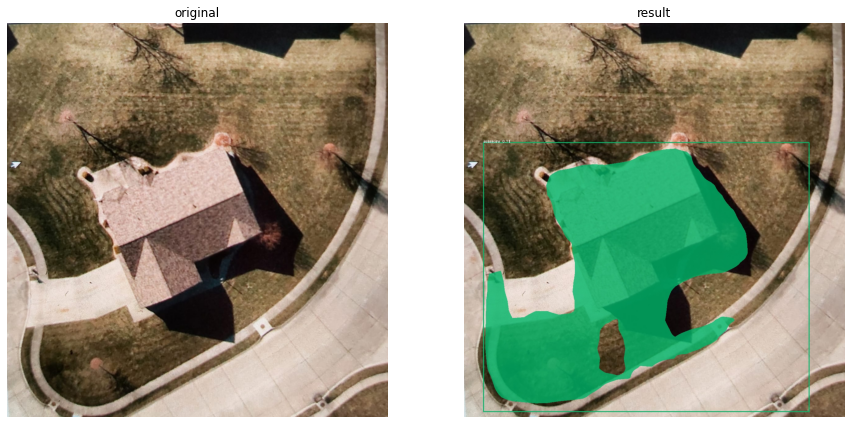

In [23]:
compareColorImage(in_img_path,instance_segmented_img)

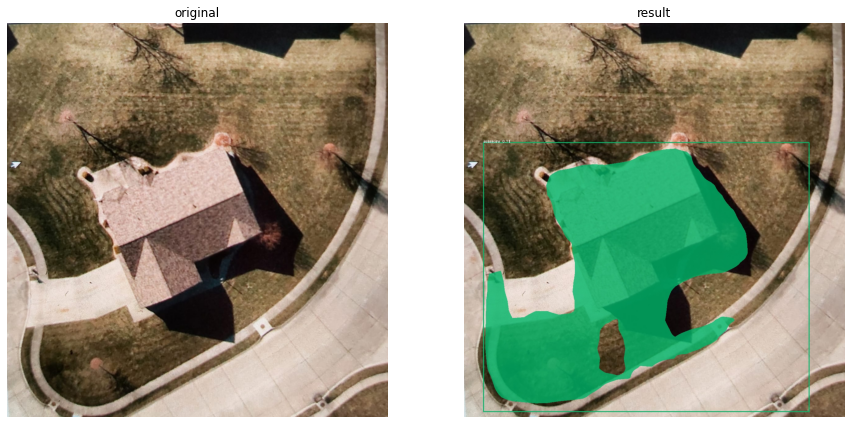

In [26]:
compareColorImage(in_img_path,instance_segmented_img)